In [1]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, Sequential, save_model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
train_dataset = 'train/'
test_dataset = 'test/'

# Configuração do gerador de dados para pré-processamento e aumento de dados
datagen = ImageDataGenerator(
    rescale=1./255,         # Normaliza os valores dos pixels para o intervalo [0, 1]
    #shear_range=0.2,        # Aplica corte aleatório
    #zoom_range=0.2,         # Aplica zoom aleatório
    #horizontal_flip=True,   # Inverte aleatoriamente as imagens horizontalmente
)

# Carrega e pré-processa as imagens de treinamento
train_generator = datagen.flow_from_directory(
    train_dataset,
    target_size=(224, 224),  # Tamanho das imagens esperado pela InceptionV3
    batch_size=32,
    class_mode='categorical', # 'categorical' se for classificação com mais de duas classes
    #subset='training'        # Especifica se é para conjunto de treinamento
)

# Carrega e pré-processa as imagens de validação
test_generator = datagen.flow_from_directory(
    test_dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    #subset='validation'      # Especifica se é para conjunto de validação
)

Found 18325 images belonging to 10 classes.
Found 7854 images belonging to 10 classes.


In [3]:
model = Sequential()

model.add(
    InceptionV3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Cria um novo modelo com as camadas personalizadas
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

# y_train_one_hot = to_categorical(train_generator.labels, num_classes=10)

# Substitua X_train e y_train pelos seus dados de treinamento e rótulos
history = model.fit(train_generator, epochs=10, batch_size=32, validation_data=test_generator)

Epoch 1/10
573/573 [==============================] - 2273s 4s/step - loss: 2.6619 - accuracy: 0.1386 - val_loss: 2.1415 - val_accuracy: 0.2582
Epoch 2/10
573/573 [==============================] - 2189s 4s/step - loss: 2.2879 - accuracy: 0.2342 - val_loss: 1.8987 - val_accuracy: 0.3778
Epoch 3/10
573/573 [==============================] - 2185s 4s/step - loss: 2.0610 - accuracy: 0.3096 - val_loss: 1.7034 - val_accuracy: 0.4632
Epoch 4/10
573/573 [==============================] - 2185s 4s/step - loss: 1.8682 - accuracy: 0.3780 - val_loss: 1.5347 - val_accuracy: 0.5444
Epoch 5/10
573/573 [==============================] - 2184s 4s/step - loss: 1.6945 - accuracy: 0.4402 - val_loss: 1.3867 - val_accuracy: 0.6094
Epoch 6/10
573/573 [==============================] - 2183s 4s/step - loss: 1.5705 - accuracy: 0.4893 - val_loss: 1.2509 - val_accuracy: 0.6678
Epoch 7/10
573/573 [==============================] - 2188s 4s/step - loss: 1.4322 - accuracy: 0.5405 - val_loss: 1.1295 - val_accuracy:

In [9]:
model.save('modelo.h5')

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
loaded_model = load_model('modelo.h5')

In [8]:
test_generator.reset()
predictions = loaded_model.predict(test_generator)

246/246 [==============================] - 147s 599ms/step


In [24]:
target_names = ['Aranha', 'Borboleta', 'Cachorro', 'Cavalo', 'Elefante', 'Esquilo', 'Galinha', 'Gato', 'Ovelha', 'Vaca']

y_pred_array = (predictions).astype(int)
y_pred = np.argmax(y_pred_array, axis=1)
# test_generator
y_true = test_generator.classes
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

      Aranha       0.19      0.68      0.29      1446
   Borboleta       0.07      0.04      0.05       634
    Cachorro       0.19      0.09      0.12      1459
      Cavalo       0.10      0.05      0.07       787
    Elefante       0.08      0.02      0.04       434
     Esquilo       0.07      0.03      0.04       559
     Galinha       0.12      0.08      0.10       929
        Gato       0.12      0.01      0.02       500
      Ovelha       0.04      0.00      0.01       546
        Vaca       0.08      0.01      0.01       560

    accuracy                           0.16      7854
   macro avg       0.11      0.10      0.07      7854
weighted avg       0.12      0.16      0.11      7854



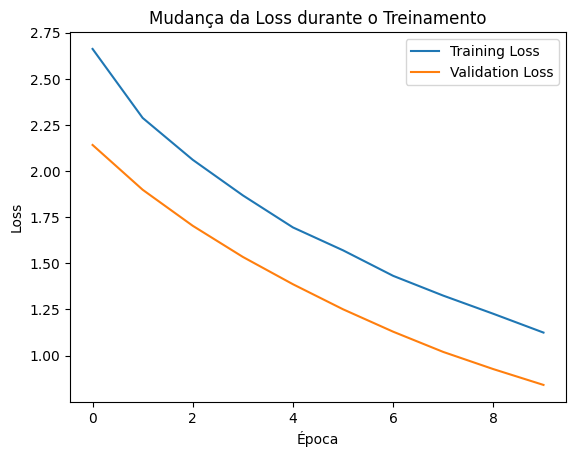

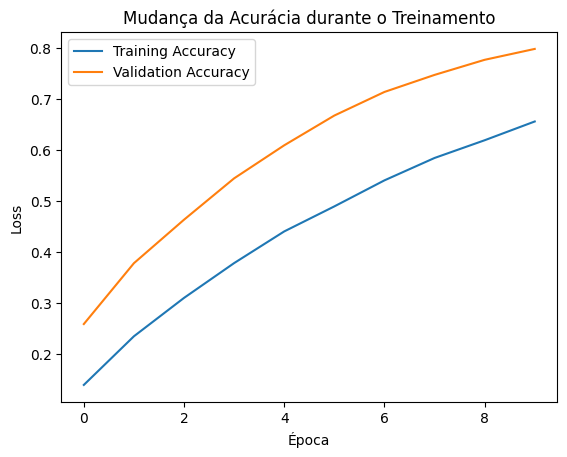

In [4]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# plt.ylim(0, 0.5)
# plt.yticks(np.arange(0, 0.5, 0.1))

# Plotagem da loss
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Mudança da Loss durante o Treinamento')
plt.legend()
plt.show()
# Plotagem da accuracy
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Mudança da Acurácia durante o Treinamento')
plt.legend()
plt.show()